In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# źródło - https://www.kaggle.com/datasets/claytonmiller/cubems-smart-building-energy-and-iaq-data
df = pd.read_csv('2018Floor2.csv')
df.head()

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN


a) indentyfikacja

In [3]:
df.isnull().sum()

Date                 0
z1_AC1(kW)         474
z1_Light(kW)       435
z1_Plug(kW)        437
z1_S1(degC)     163030
z1_S1(RH%)      163030
z1_S1(lux)      163030
z2_AC1(kW)         586
z2_AC2(kW)         440
z2_AC3(kW)         440
z2_AC4(kW)         440
z2_AC5(kW)         492
z2_AC6(kW)         492
z2_AC7(kW)         492
z2_AC8(kW)         492
z2_AC9(kW)         492
z2_AC10(kW)        492
z2_AC11(kW)        492
z2_AC12(kW)        492
z2_AC13(kW)        492
z2_AC14(kW)        492
z2_Light(kW)       438
z2_Plug(kW)        439
z2_S1(degC)     163288
z2_S1(RH%)      163288
z2_S1(lux)      163288
z3_Light(kW)       437
z3_Plug(kW)        437
z3_S1(degC)     162409
z3_S1(RH%)      162409
z3_S1(lux)      162409
z4_AC1(kW)         539
z4_Light(kW)       440
z4_Plug(kW)        439
z4_S1(degC)     264960
z4_S1(RH%)      264960
z4_S1(lux)      264960
dtype: int64

b) usunięcie tych wartości

In [4]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

Date            0.0
z1_AC1(kW)      0.0
z1_Light(kW)    0.0
z1_Plug(kW)     0.0
z1_S1(degC)     0.0
z1_S1(RH%)      0.0
z1_S1(lux)      0.0
z2_AC1(kW)      0.0
z2_AC2(kW)      0.0
z2_AC3(kW)      0.0
z2_AC4(kW)      0.0
z2_AC5(kW)      0.0
z2_AC6(kW)      0.0
z2_AC7(kW)      0.0
z2_AC8(kW)      0.0
z2_AC9(kW)      0.0
z2_AC10(kW)     0.0
z2_AC11(kW)     0.0
z2_AC12(kW)     0.0
z2_AC13(kW)     0.0
z2_AC14(kW)     0.0
z2_Light(kW)    0.0
z2_Plug(kW)     0.0
z2_S1(degC)     0.0
z2_S1(RH%)      0.0
z2_S1(lux)      0.0
z3_Light(kW)    0.0
z3_Plug(kW)     0.0
z3_S1(degC)     0.0
z3_S1(RH%)      0.0
z3_S1(lux)      0.0
z4_AC1(kW)      0.0
z4_Light(kW)    0.0
z4_Plug(kW)     0.0
z4_S1(degC)     0.0
z4_S1(RH%)      0.0
z4_S1(lux)      0.0
dtype: float64

c) usunięcie całej cechy, jeśli powyżej zadanego progu braków

In [5]:
df_copy = df.copy()
threshold = 0.5
df_copy = df_copy.dropna(thresh=threshold * df_copy.shape[0], axis=1)
df_copy.isnull().sum()

Date              0
z1_AC1(kW)      474
z1_Light(kW)    435
z1_Plug(kW)     437
z2_AC1(kW)      586
z2_AC2(kW)      440
z2_AC3(kW)      440
z2_AC4(kW)      440
z2_AC5(kW)      492
z2_AC6(kW)      492
z2_AC7(kW)      492
z2_AC8(kW)      492
z2_AC9(kW)      492
z2_AC10(kW)     492
z2_AC11(kW)     492
z2_AC12(kW)     492
z2_AC13(kW)     492
z2_AC14(kW)     492
z2_Light(kW)    438
z2_Plug(kW)     439
z3_Light(kW)    437
z3_Plug(kW)     437
z4_AC1(kW)      539
z4_Light(kW)    440
z4_Plug(kW)     439
dtype: int64

d) wpisanie stałej wartości nieobecnej w zakresie cechy

In [6]:
df_copy = df.copy()
# Każda z tych cech określa wartości pomiarowe, przez co są większe lub równe 0. Dlatego brakujące wartości można
# zaznaczyć np. liczbą -1, i można to zrobić "za jednym razem" dla wszystkich kolumn (kolumnie Date nie brakuje żadnych
# wartości)
df_copy.fillna(-1, inplace=True)
print(df_copy.isnull().sum())
df_copy.head(10)

Date            0
z1_AC1(kW)      0
z1_Light(kW)    0
z1_Plug(kW)     0
z1_S1(degC)     0
z1_S1(RH%)      0
z1_S1(lux)      0
z2_AC1(kW)      0
z2_AC2(kW)      0
z2_AC3(kW)      0
z2_AC4(kW)      0
z2_AC5(kW)      0
z2_AC6(kW)      0
z2_AC7(kW)      0
z2_AC8(kW)      0
z2_AC9(kW)      0
z2_AC10(kW)     0
z2_AC11(kW)     0
z2_AC12(kW)     0
z2_AC13(kW)     0
z2_AC14(kW)     0
z2_Light(kW)    0
z2_Plug(kW)     0
z2_S1(degC)     0
z2_S1(RH%)      0
z2_S1(lux)      0
z3_Light(kW)    0
z3_Plug(kW)     0
z3_S1(degC)     0
z3_S1(RH%)      0
z3_S1(lux)      0
z4_AC1(kW)      0
z4_Light(kW)    0
z4_Plug(kW)     0
z4_S1(degC)     0
z4_S1(RH%)      0
z4_S1(lux)      0
dtype: int64


,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
1,2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
2,2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
3,2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
4,2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
5,2018-07-01 00:05:00,0.0,0.01,0.15,28.36,58.94,0.0,1.07,0.0,0.0,...,0.32,29.28,68.31,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
6,2018-07-01 00:06:00,0.0,0.01,0.15,28.36,58.95,0.0,1.06,0.0,0.0,...,0.32,29.27,68.31,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
7,2018-07-01 00:07:00,0.0,0.01,0.15,28.36,58.96,0.0,1.07,0.0,0.0,...,0.32,29.27,68.17,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
8,2018-07-01 00:08:00,0.0,0.01,0.15,28.36,58.97,0.0,1.08,0.0,0.0,...,0.32,29.26,68.17,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
9,2018-07-01 00:09:00,0.0,0.01,0.15,28.36,58.99,0.0,1.08,0.0,0.0,...,0.32,29.25,68.16,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0


e) wpisanie średniej/dominanty/mediany (w zależności od formatu cechy)

- wartości nie są znacząco przekrzywione w żadną ze stron -> średnia

<AxesSubplot:>

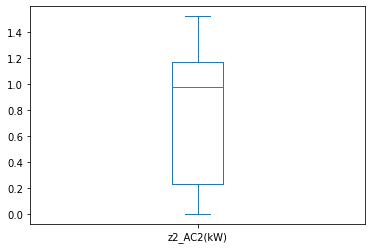

In [7]:
df['z2_AC2(kW)'].plot(kind='box')

In [8]:
df_copy = df.copy()
mean = df_copy['z2_AC2(kW)'].mean()
print(mean)
example_ids = df_copy[df_copy['z2_AC2(kW)'].isna()].index[:5]
df_copy['z2_AC2(kW)'] = df_copy['z2_AC2(kW)'].fillna(mean)
df_copy.loc[example_ids, 'z2_AC2(kW)']

0.661284137305021


32629    0.661284
68092    0.661284
68093    0.661284
68094    0.661284
68095    0.661284
Name: z2_AC2(kW), dtype: float64

- wartości są przekrzywione w jedną ze stron - dominanta lub mediana

<AxesSubplot:>

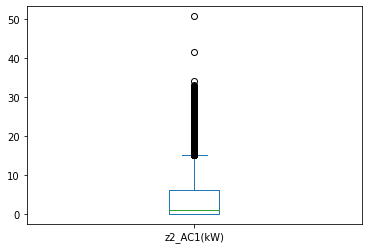

In [9]:
df['z2_AC1(kW)'].plot(kind='box')

In [10]:
df_copy = df.copy()
median = df_copy['z2_AC1(kW)'].median()
print(median)
example_ids = df_copy[df_copy['z2_AC1(kW)'].isna()].index[:5]
df_copy['z2_AC1(kW)'] = df_copy['z2_AC1(kW)'].fillna(median)
df_copy.loc[example_ids, 'z2_AC1(kW)']

1.02


13762    1.02
13763    1.02
13764    1.02
14030    1.02
14031    1.02
Name: z2_AC1(kW), dtype: float64

<AxesSubplot:>

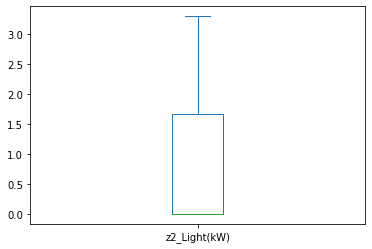

In [11]:
df['z2_Light(kW)'].plot(kind='box')

In [12]:
df_copy = df.copy()
mode = df_copy['z2_Light(kW)'].median()
print(mode)
example_ids = df_copy[df_copy['z2_Light(kW)'].isna()].index[:5]
df_copy['z2_Light(kW)'] = df_copy['z2_Light(kW)'].fillna(mode)
df_copy.loc[example_ids, 'z2_Light(kW)']

0.0


32629    0.0
68092    0.0
68093    0.0
68094    0.0
68095    0.0
Name: z2_Light(kW), dtype: float64

f) usunięcie losowych wartości w losowych cechach z danych pełnych

usunięcie rozumiane jako zamiana wartości na NaN

In [13]:
df_copy = df.copy()

# przygotowanie paru cech z danymi pełnymi, ponieważ wybrany dataset nie ma ani jednej cechy (pomijając cechę Date,
# która w tym datasecie pełni po części rolę indeksu), która miałaby pełne dane
columns_num = 5
columns_to_fill = random.sample(list(df_copy.columns[1:]), columns_num)
for column_to_fill in columns_to_fill:
    df_copy[column_to_fill].fillna(-1, inplace=True)
df_copy.isnull().sum()

Date                 0
z1_AC1(kW)         474
z1_Light(kW)       435
z1_Plug(kW)        437
z1_S1(degC)     163030
z1_S1(RH%)      163030
z1_S1(lux)      163030
z2_AC1(kW)         586
z2_AC2(kW)         440
z2_AC3(kW)         440
z2_AC4(kW)           0
z2_AC5(kW)         492
z2_AC6(kW)         492
z2_AC7(kW)         492
z2_AC8(kW)           0
z2_AC9(kW)         492
z2_AC10(kW)          0
z2_AC11(kW)        492
z2_AC12(kW)        492
z2_AC13(kW)        492
z2_AC14(kW)          0
z2_Light(kW)       438
z2_Plug(kW)        439
z2_S1(degC)     163288
z2_S1(RH%)           0
z2_S1(lux)      163288
z3_Light(kW)       437
z3_Plug(kW)        437
z3_S1(degC)     162409
z3_S1(RH%)      162409
z3_S1(lux)      162409
z4_AC1(kW)         539
z4_Light(kW)       440
z4_Plug(kW)        439
z4_S1(degC)     264960
z4_S1(RH%)      264960
z4_S1(lux)      264960
dtype: int64

In [14]:
# usunięcie losowych wartości
replace_rows_size = 100
replace_rows = []
for _ in range(columns_num):
    replace_rows.append(list(np.random.randint(0, high=len(df_copy), size=replace_rows_size)))

for column_to_fill, replace_row in zip(columns_to_fill, replace_rows):
    df_copy.loc[replace_row, column_to_fill] = np.nan
    
df_copy.isnull().sum()

Date                 0
z1_AC1(kW)         474
z1_Light(kW)       435
z1_Plug(kW)        437
z1_S1(degC)     163030
z1_S1(RH%)      163030
z1_S1(lux)      163030
z2_AC1(kW)         586
z2_AC2(kW)         440
z2_AC3(kW)         440
z2_AC4(kW)         100
z2_AC5(kW)         492
z2_AC6(kW)         492
z2_AC7(kW)         492
z2_AC8(kW)         100
z2_AC9(kW)         492
z2_AC10(kW)        100
z2_AC11(kW)        492
z2_AC12(kW)        492
z2_AC13(kW)        492
z2_AC14(kW)         99
z2_Light(kW)       438
z2_Plug(kW)        439
z2_S1(degC)     163288
z2_S1(RH%)         100
z2_S1(lux)      163288
z3_Light(kW)       437
z3_Plug(kW)        437
z3_S1(degC)     162409
z3_S1(RH%)      162409
z3_S1(lux)      162409
z4_AC1(kW)         539
z4_Light(kW)       440
z4_Plug(kW)        439
z4_S1(degC)     264960
z4_S1(RH%)      264960
z4_S1(lux)      264960
dtype: int64

In [15]:
df_copy[df_copy['z1_AC1(kW)'].isnull()]

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
13694,2018-07-10 12:14:00,NaN,8.95,3.48,23.2,50.77,82.0,41.47,1.22,0.92,...,0.44,27.22,58.7,7.0,14.4,2.21,0.0,NaN,NaN,NaN
68087,2018-08-17 06:47:00,NaN,4.52,0.84,NaN,NaN,NaN,NaN,1.16,0.88,...,2.57,NaN,NaN,NaN,NaN,0.45,0.0,NaN,NaN,NaN
68088,2018-08-17 06:48:00,NaN,4.52,0.83,NaN,NaN,NaN,NaN,1.14,0.85,...,1.28,NaN,NaN,NaN,NaN,0.45,0.0,NaN,NaN,NaN
68089,2018-08-17 06:49:00,NaN,4.52,0.77,NaN,NaN,NaN,NaN,1.14,0.85,...,0.42,NaN,NaN,NaN,NaN,0.45,0.0,NaN,NaN,NaN
68090,2018-08-17 06:50:00,NaN,4.52,0.82,NaN,NaN,NaN,NaN,1.18,0.90,...,0.42,NaN,NaN,NaN,NaN,0.45,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173142,2018-10-29 05:42:00,NaN,0.02,0.24,NaN,NaN,NaN,NaN,1.13,0.84,...,0.34,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN
173143,2018-10-29 05:43:00,NaN,0.02,0.24,NaN,NaN,NaN,NaN,1.12,0.83,...,0.35,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN
173144,2018-10-29 05:44:00,NaN,0.02,0.24,NaN,NaN,NaN,NaN,1.14,0.85,...,0.35,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN
229492,2018-12-07 08:52:00,NaN,7.71,3.21,NaN,NaN,NaN,NaN,1.21,0.92,...,0.36,NaN,NaN,NaN,NaN,1.75,0.0,NaN,NaN,NaN
